In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:

data = '/kaggle/input/2024-population-projections-by-country/2024Populations.csv'

df = pd.read_csv(filepath_or_buffer=data)


# Exploratory Data Analysis

In [3]:
df.head(5)

,rank,country,TwoLetterID,unMember,pop1980,pop2000,pop2010,pop2023,pop2024,pop2030,pop2050,landAreaKm,2024YoYChange,2024YoYGrowthRate,2024WorldPercentage,Density_2024
0,1,India,IN,True,696828385,1059633675,1240613620,1428627663,1441719852,1514994080,1670490596,2973190.0,13092189,0.009164,0.177614,484.906734
1,2,China,CN,True,982372466,1264099069,1348191368,1425671352,1425178782,1415605906,1312636325,9424702.9,-492570,-0.000346,0.175577,151.217370
2,3,United States,US,True,223140018,282398554,311182845,339996563,341814420,352162301,375391963,9147420.0,1817857,0.005347,0.042110,37.367304
3,4,Indonesia,ID,True,148177096,214072421,244016173,277534122,279798049,292150100,317225213,1877519.0,2263927,0.008157,0.034470,149.025416
4,5,Pakistan,PK,True,80624057,154369924,194454498,240485658,245209815,274029836,367808468,770880.0,4724157,0.019644,0.030209,318.090773


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 234 non-null    int64  
 1   country              234 non-null    object 
 2   TwoLetterID          233 non-null    object 
 3   unMember             234 non-null    bool   
 4   pop1980              234 non-null    int64  
 5   pop2000              234 non-null    int64  
 6   pop2010              234 non-null    int64  
 7   pop2023              234 non-null    int64  
 8   pop2024              234 non-null    int64  
 9   pop2030              234 non-null    int64  
 10  pop2050              234 non-null    int64  
 11  landAreaKm           234 non-null    float64
 12  2024YoYChange        234 non-null    int64  
 13  2024YoYGrowthRate    234 non-null    float64
 14  2024WorldPercentage  234 non-null    float64
 15  Density_2024         234 non-null    flo

In [5]:
df.describe()

,rank,pop1980,pop2000,pop2010,pop2023,pop2024,pop2030,pop2050,landAreaKm,2024YoYChange,2024YoYGrowthRate,2024WorldPercentage,Density_2024
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,2.340000e+02,234.000000
mean,117.500000,1.898462e+07,2.626947e+07,2.984524e+07,3.437443e+07,3.468862e+07,3.651461e+07,4.148628e+07,5.571123e+05,3.141905e+05,0.009135,4.273504e-03,456.125781
std,67.694165,8.178519e+07,1.116982e+08,1.242185e+08,1.373864e+08,1.380750e+08,1.417827e+08,1.481676e+08,1.689972e+06,1.075131e+06,0.011379,1.701031e-02,1991.330932
min,1.000000,7.330000e+02,6.510000e+02,5.960000e+02,7.640000e+02,7.640000e+02,7.640000e+02,7.640000e+02,4.400000e-01,-8.043410e+05,-0.030870,9.412187e-08,0.138358
25%,59.250000,2.296142e+05,3.272420e+05,3.931490e+05,4.225982e+05,4.264565e+05,4.561490e+05,5.466058e+05,2.625875e+03,1.975000e+02,0.001928,5.253780e-05,39.801183
50%,117.500000,3.141146e+06,4.292907e+06,4.942770e+06,5.643895e+06,5.626359e+06,6.178231e+06,6.352397e+06,7.568925e+04,1.997850e+04,0.007786,6.931458e-04,98.287400
75%,175.750000,9.826054e+06,1.576230e+07,1.915957e+07,2.324537e+07,2.392272e+07,2.616311e+07,3.568614e+07,4.047876e+05,2.238608e+05,0.015670,2.947187e-03,248.223177
max,234.000000,9.823725e+08,1.264099e+09,1.348191e+09,1.428628e+09,1.441720e+09,1.514994e+09,1.670491e+09,1.637687e+07,1.309219e+07,0.048264,1.776143e-01,21674.224920


In [6]:
df.isnull().sum()

rank                   0
country                0
TwoLetterID            1
unMember               0
pop1980                0
pop2000                0
pop2010                0
pop2023                0
pop2024                0
pop2030                0
pop2050                0
landAreaKm             0
2024YoYChange          0
2024YoYGrowthRate      0
2024WorldPercentage    0
Density_2024           0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


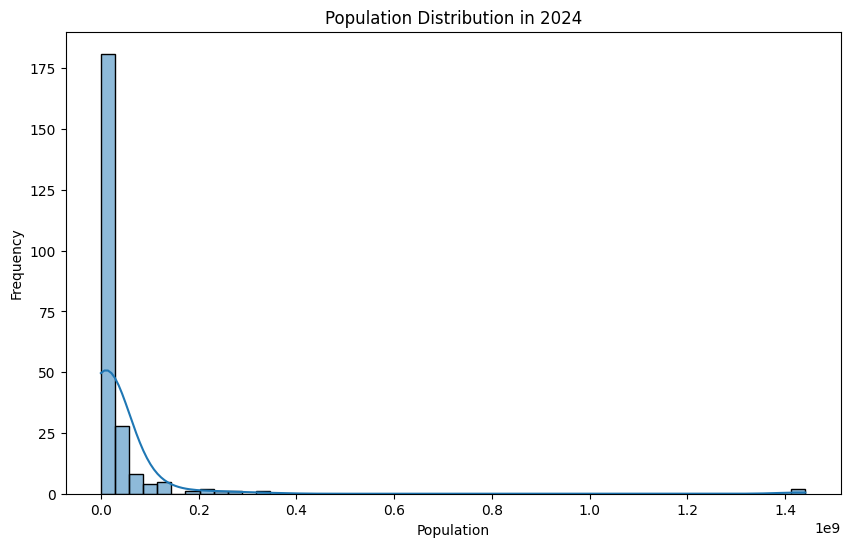

In [7]:
#data visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['pop2024'], bins=50, kde=True)
plt.title('Population Distribution in 2024')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

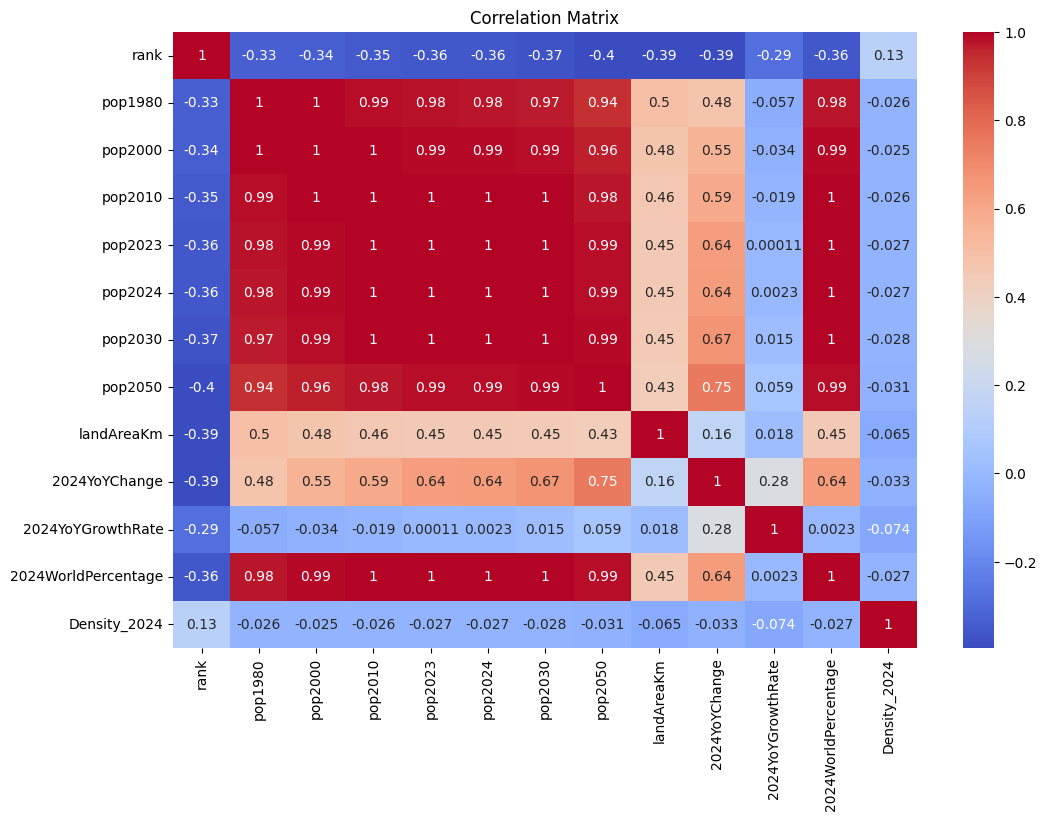

In [8]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Data preprocessing

In [9]:
le = LabelEncoder()
df['unMember'] = le.fit_transform(df['unMember'])


In [10]:
df

,rank,country,TwoLetterID,unMember,pop1980,pop2000,pop2010,pop2023,pop2024,pop2030,pop2050,landAreaKm,2024YoYChange,2024YoYGrowthRate,2024WorldPercentage,Density_2024
0,1,India,IN,1,696828385,1059633675,1240613620,1428627663,1441719852,1514994080,1670490596,2973190.00,13092189,0.009164,1.776143e-01,484.906734
1,2,China,CN,1,982372466,1264099069,1348191368,1425671352,1425178782,1415605906,1312636325,9424702.90,-492570,-0.000346,1.755766e-01,151.217370
2,3,United States,US,1,223140018,282398554,311182845,339996563,341814420,352162301,375391963,9147420.00,1817857,0.005347,4.211022e-02,37.367304
3,4,Indonesia,ID,1,148177096,214072421,244016173,277534122,279798049,292150100,317225213,1877519.00,2263927,0.008157,3.447004e-02,149.025416
4,5,Pakistan,PK,1,80624057,154369924,194454498,240485658,245209815,274029836,367808468,770880.00,4724157,0.019644,3.020891e-02,318.090773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,Montserrat,MS,0,11452,5138,4938,4386,4372,4301,3781,102.00,-14,-0.003192,5.386136e-07,42.862745
230,231,Falkland Islands,FK,0,2240,3080,3187,3791,3803,3869,3779,12173.00,12,0.003165,4.685150e-07,0.312413
231,232,Niue,NU,0,3637,2074,1812,1935,1935,1948,2096,261.00,0,0.000000,2.383846e-07,7.413793
232,233,Tokelau,TK,0,1647,1666,1367,1893,1915,2046,2430,10.00,22,0.011622,2.359206e-07,191.500000


# Spliting data

In [11]:
# Define Features and Target
X = df.drop(['pop2024','country','TwoLetterID','rank'], axis=1)
y = df['pop2024']

In [12]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
#scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Random Forest

In [14]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

# Model Evaluation

In [15]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


In [16]:
print("Training Data Evaluation")
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("R²:", r2_score(y_train, y_pred_train))


Training Data Evaluation
MAE: 2150395.804117647
MSE: 256084734056440.66
RMSE: 16002647.720188078
R²: 0.9890543590104486


In [17]:
print("Testing Data Evaluation")
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("R²:", r2_score(y_test, y_pred_test))


Testing Data Evaluation
MAE: 667108.1585106383
MSE: 2703484181932.289
RMSE: 1644227.533503891
R²: 0.9977267477934443


In [18]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)


                       importance
pop2030              1.604756e-01
pop2023              1.511485e-01
2024WorldPercentage  1.490374e-01
pop2010              1.326945e-01
pop2000              1.307533e-01
pop1980              1.286867e-01
pop2050              9.555338e-02
2024YoYChange        4.204346e-02
landAreaKm           9.290905e-03
2024YoYGrowthRate    2.027740e-04
Density_2024         1.134225e-04
unMember             9.255893e-09


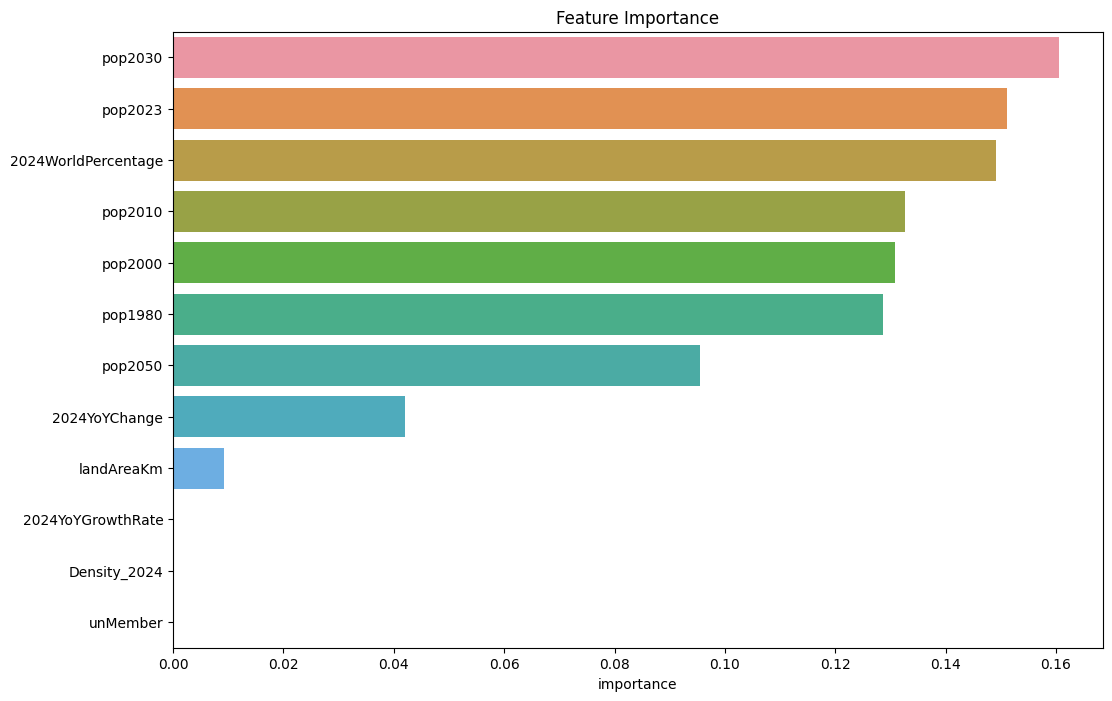

In [19]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importance')
plt.show()


# Hyperparameter Tuning

In [20]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
   
}

In [21]:
rf = RandomForestRegressor(random_state=42)


In [22]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [23]:
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, verbose=2)

In [24]:
print("Best Hyperparameters:")
print(random_search.best_params_)

Best Hyperparameters:
{'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 10}


In [25]:
best_rf = RandomForestRegressor(n_estimators=200, min_samples_split=2, max_depth=None, random_state=42)

In [26]:
best_rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [27]:
y_pred_test = best_rf.predict(X_test)

In [28]:
print("Testing Data Evaluation with Best Hyperparameters:")
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("R²:", r2_score(y_test, y_pred_test))

Testing Data Evaluation with Best Hyperparameters:
MAE: 678994.5520212768
MSE: 3036358679924.6064
RMSE: 1742515.0443897482
R²: 0.9974468468818265
